In [2]:

# coding: utf-8

# In[2]:


import numpy as np
import random

def read_libsvm(fname):
    with open(fname) as f:
        x,y  =list(),list()
        for l in f:
            line = l.strip().split(" ")
            y.append(int(line[0]))
            x.append([float(s.split(":")[1]) for s in line[1:]])
    return np.array(y),np.array(x)


class Module:
    def forward(self,x):
        pass
    def backward_updateGradient(self,x,delta):
        pass
    def zeroGradParameters(self):
        pass

    
class Loss :
    def getLossValue (self, ypredit ,y):
        pass
    def backward(self,ypredit,y):
        pass
    
        
        
class TanHModule(Module):
    def __init__(self,dimension):
        self.X = dimension
    
    def forward(self,x):
        result[i] = np.tanh(x[i])
        return result
    
    
class SquareLoss(Loss) :
    def __init__(self,dimension):
        self.dimension=dimension
        
    def getLossValue (self, y_predit,y):
        loss = 0.0
        for k in range(0,self.dimension) :
            loss += (y_predit[k]-y[k])*(y_predit[k]-y[k])
        loss /= self.dimension
        return loss
    
    def backward(self,y_predit, y):
        grad = np.zeros(self.dimension)
        for k in range(0,self.dimension):
            grad[k] = 2/self.dimension*(y_predit[k]-y[k])
        return grad
    
    
class LinearModule(Module):
    def __init__(self,n,C):
        self.X = n #input_dimension
        self.Y = C #ouput_dimension
        self.theta = np.zeros((self.X,self.Y))
        self.grad = np.zeros((self.X,self.Y))
        
    def zeroGradParameters(self):
        self.grad = np.zeros((self.X,self.Y))

    def forward(self,x):
        result = np.dot(x,self.theta)
        return result
    
    def randomize(self, variance):
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.theta[i][j]= random.uniform(0,variance)
        
    def backward_updateGradient(self,x,delta):
        #delta = R^C
        #Grad_\theta(loss(f_theta(x),y) \in R^{C \times n}
        for i in range(0,self.X):
            for j in range(0,self.Y):
                self.grad[i][j] += delta[j]*x[i]
        #return self.grad
    
    def updateParameters(self,learning_rate):
        self.theta = self.theta - learning_rate*self.grad
        
        
        
data = read_libsvm('breast-cancer_scale.txt')
data_real = np.concatenate((np.asmatrix(data[1]),np.transpose(np.asmatrix(data[0]))),axis=1)

np.random.shuffle(data_real) #Suffle the data

x_train = np.asarray(data_real[0:int(0.66*len(data[0])),0:10]) #2/3 tiers pour le train
y_train = np.asarray(data_real[0:int(0.66*len(data[0])),10])
x_test  = np.asarray(data_real[int(0.66*len(data[0])):len(data[0]),0:10])
y_test  = np.asarray(data_real[int(0.66*len(data[0])):len(data[0]),10])

y_train = y_train -3 #mettons les labels 4 à 1 et le 2 à -1 
y_test = y_test - 3






In [3]:
model = LinearModule(10,1)
model.randomize(0.1)
criterion = SquareLoss(1)
learning_rate= 0.01 
maxEpoch = 1000 

all_losses= np.zeros(maxEpoch)
all_losses_global_train=np.zeros(maxEpoch)
all_losses_global_test=np.zeros(maxEpoch)
all_out =np.zeros(maxEpoch)
accuracy_train=np.zeros(maxEpoch)
accuracy_test=np.zeros(maxEpoch)

In [4]:
# In[4]:

#Stochastic

for iteration in range(0,maxEpoch) : 
    j=random.randint(0,len(x_train)-1)
    model.zeroGradParameters()
    x=x_train[j]
    y=[y_train[j]]
    out = model.forward(x) #valeur avec le modele
    loss=criterion.getLossValue(out,y) #perte de y_prédit et y
    delta=criterion.backward(out,y) #premiere partie du gradient
    model.backward_updateGradient(x,delta) #gradient calculé
    all_losses[iteration]=loss
    model.updateParameters(learning_rate) #update des parameters
    
    all_losses_global_train[iteration] = 0
    for k in range(0,len(x_train)):
        all_losses_global_train[iteration] += criterion.getLossValue(model.forward(x_train[k]),[y_train[k]])/len(x_train)
    
    all_losses_global_test[iteration] = 0
    for k in range(0,len(x_test)):
        all_losses_global_test[iteration] += criterion.getLossValue(model.forward(x_test[k]),[y_test[k]])/len(x_test)
    
    accuracy_train[iteration] = 0
    for k in range(0,len(x_train)):
        # je comprend pas ca deja la ligne en soi
        #et en plus pourquoi il fait ca ici, il devrait pas le faire en dehors de la boucle d'apprentissage ?? pareil pour en dessous
        accuracy_train[iteration] += ((np.sign(model.forward(x_train[k]))*[y_train[k]])+1)/2/len(x_train)
     
    accuracy_test[iteration] = 0
    for k in range(0,len(x_test)):
        accuracy_test[iteration] += ((np.sign(model.forward(x_test[k]))*[y_test[k]])+1)/2/len(x_test)
     

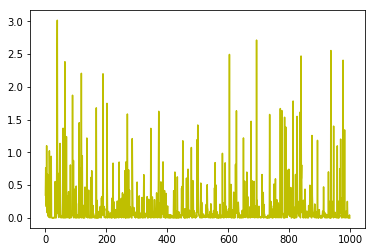

[  3.47795964e-01   7.62832593e-01   2.37990532e-01   1.72051325e-01
   1.10058839e+00   1.12293230e-01   7.84084695e-02   6.64507183e-01
   2.79494678e-02   4.45829975e-02   3.02664925e-01   1.16499933e-02
   3.32296219e-01   1.02324147e+00   6.12651418e-01   1.90500480e-03
   1.25211371e-02   2.78064779e-01   1.35227371e-02   9.39647200e-01
   2.12892696e-03   9.30153161e-04   1.28069038e-04   3.09729444e-05
   6.75097204e-03   6.86599465e-06   8.42846138e-03   1.26561762e-03
   8.54509325e-04   1.03028076e-03   3.97982759e-07   6.95717191e-03
   5.54531457e-01   5.13485737e-03   7.31575186e-02   3.92189919e-06
   1.14638092e-01   6.64112469e-01   2.10642439e+00   3.01485793e+00
   1.02093809e-01   6.77826409e-02   7.89536414e-02   2.40203228e-02
   6.49400594e-03   6.81777040e-01   4.31046252e-01   1.05682545e+00
   1.13624509e+00   6.11285635e-02   3.98552006e-03   9.45336212e-03
   1.01571124e-02   2.73301215e-02   1.01162562e-04   3.74203758e-03
   2.25544229e-01   6.69129201e-01

In [8]:
import matplotlib.pyplot as plt
plt.plot(all_losses,'y')
plt.show()
print(all_losses)

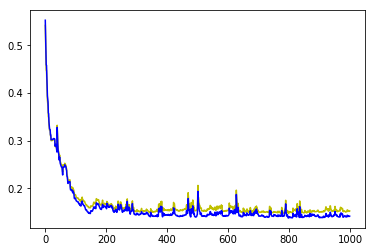

In [6]:
# In[5]:

import matplotlib.pyplot as plt
plt.plot(all_losses_global_train,'y')
plt.plot(all_losses_global_test,'b')
plt.show()


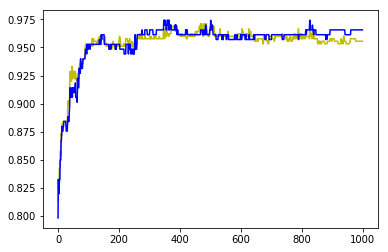

In [7]:
# In[6]:

#Accuracy
plt.plot(accuracy_train,'y')
plt.plot(accuracy_test,'b')
plt.show()


In [23]:
# In[7]:

model = LinearModule(10,1)
model.randomize(0.1)
criterion = SquareLoss(1)
learning_rate= 0.01
maxEpoch = 2000 

all_losses_global_train_batch=np.zeros(maxEpoch)
all_losses_global_test_batch=np.zeros(maxEpoch)
accuracy_train_batch=np.zeros(maxEpoch)
accuracy_test_batch=np.zeros(maxEpoch)


In [24]:
# In[8]:

#Batch
for iteration in range(0,maxEpoch) :
    model.zeroGradParameters()
    loss=0
    for j in range(0,len(x_train)):
        x=x_train[j]
        y=[y_train[j]]
        out = model.forward(x) #valeur avec le modele
        loss += criterion.getLossValue(out,y) #cout entre y_prédit et y
        delta = criterion.backward(out,y)
        model.backward_updateGradient(x,delta/len(x_train))
    all_losses_global_train_batch[iteration]= loss/len(x_train)
    
    all_losses_global_test_batch[iteration] = 0
    for k in range(0,len(x_test)):
        all_losses_global_test_batch[iteration] += criterion.getLossValue(model.forward(x_test[k]),[y_test[k]])/len(x_test)
    
    accuracy_train_batch[iteration] = 0
    for k in range(0,len(x_train)):
        accuracy_train_batch[iteration] += ((np.sign(model.forward(x_train[k]))*[y_train[k]])+1)/2/len(x_train)
     
    accuracy_test_batch[iteration] = 0
    for k in range(0,len(x_test)):
        accuracy_test_batch[iteration] += ((np.sign(model.forward(x_test[k]))*[y_test[k]])+1)/2/len(x_test)
     
    model.updateParameters(learning_rate) 

In [25]:
# In[9]:

import matplotlib.pyplot as plt
plt.plot(all_losses_global_train_batch,'y')
plt.plot(all_losses_global_test_batch,'b')
plt.show()


In [27]:
# In[10]:

#Accuracy
plt.plot(accuracy_train_batch,'y')
plt.plot(accuracy_test_batch,'b')
plt.show()

In [ ]:
def load_mnist(filename):
    with open(filename,"r") as f:
        f.readline()
        data =[ [float(x) for x in l.split()] for l in f if len(l.split())>2]
    tmp = np.array(data)
    return tmp[:,1:],tmp[:,0].astype(int)